# Lecture 16 - Machine Learning - Taxonomy, The In-Distribution Assumption

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.DataFrame({
  "Income": [0.49, 0.18, 0.31, 0.40, 0.24],
  "CrimeRate": [0.09, 0.45, 0.23, 0.19, 0.48]
})


#### Announcements:
* Lab 5: Please scrape the-numbers pages from the mirrored version hosted on my webpage.
  * Deadline extended to Sunday (2/19) night  at 10pm
  * Future labs are unaffected: Lab 6 out Friday, due Thursday as usual.
* Quiz 4 - the multiple-answer numpy question: needs manual regrading, I will get to this Soon(TM).
* Data ethics 2 due tomorrow!

#### Quiz 5
* Question 1 still needs manual grading - Soon(TM)
* Scores quite good overall! FMQ:
  * `soup.element` and `soup.find(element)` both give you the first instance of `element` in the soup
  * `soup.find_all` returns a list (even if it's an empty one)

#### Goals:
* Understand the near-universal assumption of machine learning models: **unseen data is drawn from the same distribution as the training dataset**, and the implications of this assumption.
* Understand the meaning of and distinction between **unsupervised learning** and **supervised learning**.
* Understand the meaning of and distinction between **discriminative** and **generative** learning.


* Know how to define **bias**, **variance** and **irreducible error**
* Be able to identify the most common causes of the above types of error, and explain how they relate to generalization, risk, overfitting, underfitting.

## Terminology Review
* **Model Class**
* **Loss function**
* **Empirical Risk**

Bonus:
- **training set**
- **Inputs / features / independent variables**
- **Labels / targets / dependent variables**

## From last time: Ok, how do we do this?

Overview: three steps:
1. Decide on a model class
2. Decide on a formal definition of how well a model fits the training data.
3. Optimize (search for the best model in the model class) - aka train, or learn


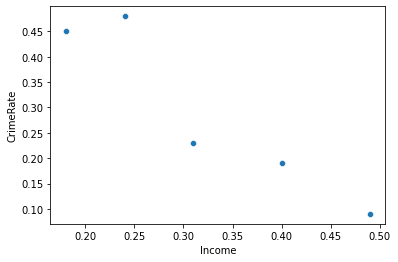

In [4]:
sns.scatterplot(data=df,x="Income",y="CrimeRate")


### Step 1: Decide on a model class
- There are a ton of options, since this looks vaguely linear, let's keep it simple:
  - Model class: linear functions; i.e., $h(x) = mx + b$
    - $x$ is the input
    - $m$ (slope) and $b$ (y-intercept) are the *parameters* of the model.
    - Equivalent terminology: $m$ and $b$ are *weights*, or $m$ is a weight and $b$ is a bias.

### Step 2: Decide on a formal definition of how well a model fits the training data.
- Break this into two substeps:
  1. Define a **loss function** that indicates how poorly the model does on a single datapoint. Here, we choose to use squared error loss (lots of alternative options):
  $$ L(h(x),y) = (h(x)-y)^2$$
    - Loss functions are typically 0 when the prediction is correct
    - Loss functions grow as the prediction is more wrong
    - Squared error loss is popular because it is (relatively) easy to optimize
  2. Compute the ***empirical risk*** (i.e., average loss over the training set)
   $$ \hat{R}(h; {\cal X}) = \frac{1}{N} \sum_{i=1}^N L(h(x_{(i)}),y_{(i)})$$
    - $h$ is the model
    - ${\cal X}$ is the training set
    - $\sum$ is adding up losses for datapoints $1,2,\dots,N$
    - Note that ${\cal X}$ is fixed -- this is a function of $h$, which in our case, means it is a function of $m$ and $b$.


### Step 3: Optimize
Training means solving the following *optimization problem*:
$$ h^* = \arg\min_{h} \hat{R}(h; {\cal X})$$
Let's break this down:
- $h^*$ the optimal model (i.e., the line with the best $m$ and $b$)
- $\arg\min_h$ means to find and return the $h$ that gives the smallest value of the function being minimized 
- $\hat{R}(h; {\cal X})$ the function being minimized

Solving this problem requires math we can't count on in this class, so let's jump to the solution:
$$ h^*(x) \approx -1.29x + 0.71$$

[Plot of solution](https://fw.cs.wwu.edu/~hutchib2/doc/ml_example.png)

## Taxonomic Considerations

### Classification vs Regression
A way to describe a prediction task, depending on the value(s) being predicted:
* If outputs are real-valued (continuous): this is a **regression task**.
  * What is the sentiment (or polarity) of this sentence, on a scale from -1 to 1?
  * Given average per capita income, what is the crime rate of a city?

* If outputs are categorical (discrete): this is a **classification task**.
  * Does this image have a cat?
  * Which of a fixed set of 1000 objects does this image depict?

### Supervised vs Unsupervised 

Supervised Learning, by example:
* $X$ is a collection of $n$ homes with $d$ numbers about each one (square feet, # bedrooms, ...); $\mathbf{y}$ is the list of market values of each home.

**Key property**: a dataset $X$ with corresponding **"ground truth"** labels $\mathbf{y}$ is available, and we want be able to to predict a $y$ given a new $\mathbf{x}$.

**Unsupervised Learning**, by example:
* Same setup, but instead of predicting $y$ for a new $\mathbf{x}$, you want to know which of the $d$ variables most heavily influences home price.

**Key property**: you aren't given "the right answer" - you're looking to *discover* structure in the data.

### Reminder: A mathematical / probabilistic perspective:

Given a set of data $X$ and (possibly) labels $y$ (i.e., quantities to predict), model either $P(y | x)$ or $P(x, y)$.

*Recall:* If you know $P(x, y)$, you can compute $P(y | x)$:

$$P(y | x) = \frac{P(x, y)}{P(x)}$$
and
$$P(x) = \sum_i P(x,y_i)$$

Let's apply this probabilistic interpretation to our crime rate prediction task:

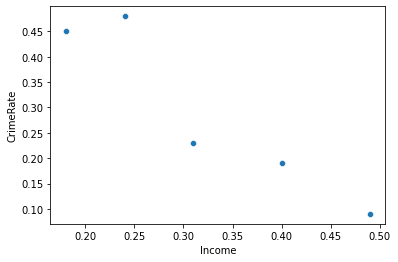

In [5]:
sns.scatterplot(data=df,x="Income",y="CrimeRate")

### Discriminative vs Generative

For the moment, let's focus on **supervised classification** for the moment. In this case, $\mathbf{x}$ is a vector and $y$ is a discrete label indicating one of a set of categories or *classes*.

**Discriminative** models try to estimate $P(y | \mathbf{x})$. If you know this, then pick the most likely label, i.e., the $y$ that maximizes $P(y | \mathbf{x})$, and that's your predicted label for $\mathbf{x}$.

* Example: [image classification](http://destiny.liacs.nl/classify_url?imageurl=https%3A%2F%2Ffacultyweb.cs.wwu.edu%2F%7Ewehrwes%2Fcourses%2Fdata311_21f%2Flectures%2FL23%2Fpumpkin_pie.jpg)

**Generative** models try to estimate $P(\mathbf{x})$ (if there are no labels $y$), or $P(x, y)$ if labels exist.

* Example: [image generation](https://thispersondoesnotexist.com/)

*Note*: it's easy to conclude that classification and discriminative are the same thing; they're not! Classifiers are often discriminative, but not always. How does that work?

Consider two schemes for classifying penguin species given their bill length and depth. 

**Exercise:** Which of these is generative and which is discriminative?

1. Draw lines through the space and classify based on which area the penguin is in: ![penguins2.png](penguins1.png)
2. Fit 2D Gaussian distributions to the three species, and classify based on which Gaussian says a point is most probable: ![penguins2.png](penguins2.png)

#### Exercises:

1. Automatically detecting outlier images - like lab 4, except fully automatic.
    * Classification, regression, or neither?
    * Supervised or unsupervised?

2. Using linear regression (i.e., a best-fit line) to predict home value based on square feet given a set of actual home data from Zillow.
    * Classification, regression, or neither?
    * Supervised or unsupervised?
    
3. Finding "communities" of people who frequently interact with each other on a social network given a dataset of information about their social interactions on the network.
    * Classification, regression, or neither?
    * Supervised or unsupervised?

## Assumptions

### Data distribution

Generally: **unseen data is drawn from the same distrubtion as your dataset.**

*Consequence:* We don't assume correlation is causation, but we do assume that observed correlations will hold in unseen data.

Specific models: many more!

For example, **linear regression** assumes:
* Columns are linearly independent (i.e., one column can't be directly computed from another
* Data is **homoscedastic**, i.e., the following won't happen:
  ![](https://upload.wikimedia.org/wikipedia/commons/a/a5/Heteroscedasticity.png)

## Big Idea: Generalization



**Generalization** is the ability of a model to perform well on **unseen** data (i.e., data that was not in the training set).

In [ ]:
sns.scatterplot(data=df,x="Income",y="CrimeRate")

We limited our model class to linear functions. What other choices might we make?
* Quadratic?
* Piecewise linear?
* Higher-order polynomial?

What effect does this choice have on the optimal value of $\hat{R}(h; \mathcal{X})$?

What effect does this choice have on the model's ability to **generalize** to unseen data?

### Empirical Risk vs True Risk
 What we *truly* care about is a quantity known as (true) *risk*: $R(h; {\cal X})$.
- Risk is the expected loss "in the wild"
- Depends on a probability distribution that we don't know. Depends on $P(x,y)$ -- probability of each input-output pair. 
  - If we knew $P$, there's nothing left to "learn."



There are three contributors to risk:
1. Bias (not the same bias as the $b$ in our linear model)
2. Variance
3. Irrereducible error

To understand bias and variance, we need to consider hypothetical:
  - There is some underlying distribution/source generating input-output pairs
    - The probabily of a pair is denoted $P(x,y)$
    - The probability of the output given the input is denoted $P(y|x)$
    - Why a distribution? Because the same input (x) can have different ouputs (y).
  - for i in 1..K
    - Get a random training set with $N$ points sampled from $P$
    - Train a model on that training set, call that $h_i(x)$.
  - Define $\bar{h}(x) = \frac{1}{N} \sum_{i=1}^K h_i(x)$

#### Bias
- The *bias* of the training process is how far $\bar{h}(x)$ is from the mean of $P(y|x)$.
- High bias implies something is keeping you from capturing true behavior of the source.
- Most common cause of bias? The model class is too restrictive aka too simple aka not powerful enough aka not expressive enough.
  - E.g., if the true relationship is quadratic, using linear functions will have high bias.
- Training processes with high bias are prone to *underfitting*.
  - Underfitting is when you fail to capture important phenomena in the input-output relationship, leading to higher risk.

#### Variance
- The *variance* of a training process is the variance of the individual models $h_i(x)$; that is, how spread they are around $\bar{h}(x)$.
- This is a problem, because we only have one $h_i$, not $\bar{h}(x)$, so our model might be way off even if the average is good.
- Most common causes of variance?
  - Too powerful/expressive of a model, which is capable of *overfitting* the the training. Overfitting means memorizing or being overly influenced by noise in the training set.
  - Small training set sizes ($N$).
  - Higher irreducible error (noisier training set).

#### Irreducible Error
- Even if you have a zero bias, zero variance training process, you then predict the mean $P(y|x)$, which is almost never right.
  - Because the truth is non-deterministic.
  - This error that remains is the *irreducible error*.
- Source of irreducible error?
  - Not having enough, or enough relevant features in $x$.
- Note: this error is only irreducible for a given feature set (the information in $x$). *If you change the problem to include more features, you can reduce irreducible error.*